Hypothesis: Distributing investments among the underlying sectors of the SP500 annually and periodically investing new cash flow to underperforming sectors will produce greater returns than standard periodic reinvestment into the SP500.

Prediction: Investment into underperforming sectors will increase short term drawdown while increasing long term returns relative to standard DCA strategy.

In [ ]:
import yahoo_fin.stock_info as si # pulling price data
from portfolio import Portfolio # portfolio management module
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100

In order to track each underlying sector of the SP500, we'll be using the Select Sector indexes from SPDR.

SP500 sectors and their representative ETFs:  
Technology - XLK  
Health Care - XLV  
Financial Services - XLF  
Consumer Discretionary - XLY  
Communication Services - XLC (founded June 18, 2018) (EXCLUDED)  
Industrial - XLI  
Consumer Staples - XLP  
Energy - XLE  
Utilities - XLU  
Real Estate - XLRE (founded October 7, 2015) (EXCLUDED)  
Materials - XLB  

First, we'll collect their 20 years historical price data and store them as csv files for easy read/write access.

In [3]:
sectors = ['XLK', 'XLV', 'XLF', 'XLY', 'XLI', 'XLP', 'XLE', 'XLU', 'XLB']

# amount to be deposited each month for all test with routine deposits
deposit = 2000

# start_date = datetime.datetime(2001, 1, 1)
# end_date = datetime.datetime(2021, 1, 1)

# for fund in sectors:
#     data = si.get_data(ticker=fund, start_date=start_date, end_date=end_date)
#     data.to_csv(path_or_buf=f'sector_historical/{fund}.csv')

Here we will initialize a portfolio instance that will allow us to track and measure the performance of each sector index.

Inside the portfolio instance we have a list of all trading days for the dataset, references for each dataframe containing the historical data, and numerous methods for conducting trades and accessing/mutating portfolio information.

Next, we'll build out a system to track the periods that our trading and portfolio balancing will take place during. We will also set our routine deposit amount.

1387014.348441124


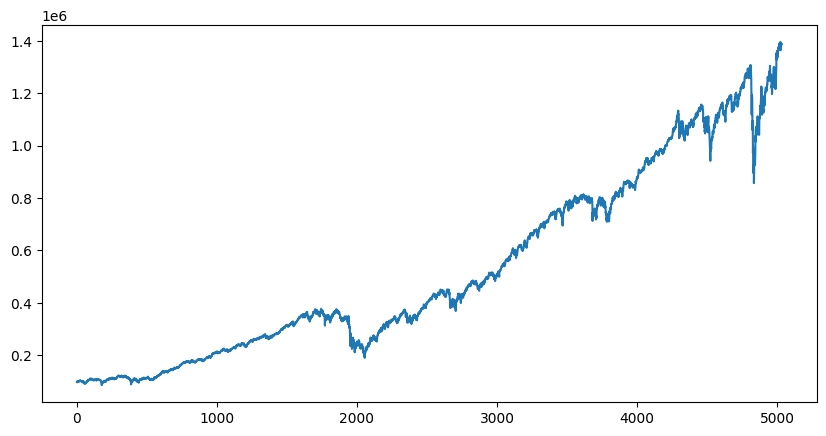

In [4]:
#########################################################################
# TEST 1 - Purchase underperformer monthly w/ annual rebalance ##########
#########################################################################

# initiate portfolio with default $100,000 capital
t1_portfolio = Portfolio()

# retrieving all dates from the data in portfolio
dates = t1_portfolio.get_datelist()

# for storing the value of the portfolio at every date as coordinate pairs
t1_x = list()
t1_y = list()

# adding our symbols (with matching data in 'sector_historical') to the portfolio
for fund in sectors:
    t1_portfolio.add(fund)

# initial balancing of portfolio with remainder going to cash
t1_portfolio.even_balance(dates[0])

# day tracking
# there are 5033 trading days in the data
# approx. 21 trading days per months, so we will rebalance, deposit, and invest on 21 day cycles.
# this is an imperfect system but will still effectively represent the target since short term pricing is stochastic

# function to operate the test
def t1_run(portfolio, deposit):

    # iterating through all dates in set
    # start at n == 1 since we did an initial balancing on n == 0
    for n in range(1, len(dates)):

        # checking if we are (approx) beginning a new trading year
        # if yes, we rebalance the portfolio with even weight distribution
        if (n % 252) == 0:
            portfolio.even_balance(dates[n])

        # checking if we are (approx) beginning a new trading month
        # if yes, determine the worst performer and purchase the maximum amount
        if (n % 21) == 0:
            # new months, depositing cash
            portfolio.deposit(deposit)

            # determining start and end dates for the trading period being evaluated
            start_date = dates[n]
            end_date = dates[n-21]

            # finding which element of the portfolio performed the worst
            # purchasing max num of shares of worst performer
            symbol = portfolio.low_performer(start_date, end_date) 
            portfolio.max_buy(symbol, dates[n])

        # after all possible changes, determining worth of cash + holdings
        value = portfolio.get_portfolio_value(dates[n])

        # storing vals to coords
        t1_x.append(n)
        t1_y.append(value)

# run test 1
t1_run(t1_portfolio, deposit)

# total value on last date
print(t1_portfolio.get_portfolio_value('2020-12-31'))

# basic plot
plt.plot(t1_x, t1_y)
plt.show()

Plotting the results, we can already clearly see resemblence to the SP500 performance.

Now for comparison we will test a base case with an initial lump sum investment equal to the total raw cash used for test 1.

1747962.9450645447


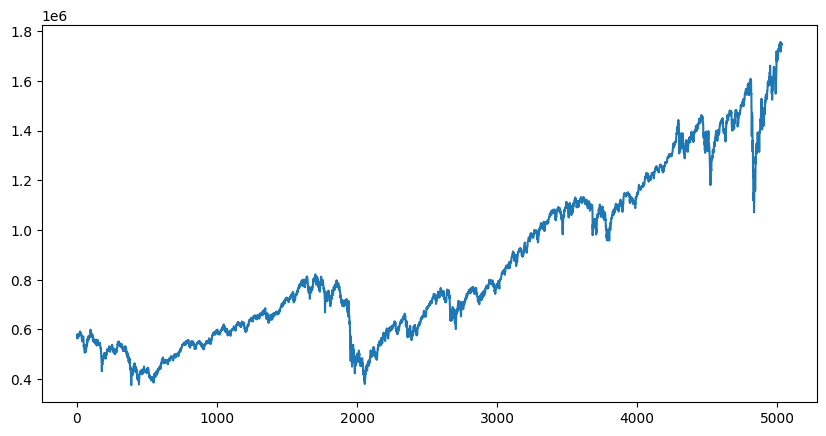

In [5]:
#########################################################################
# TEST 2 - Purchase initial lump sum ####################################
#########################################################################

t2_portfolio = Portfolio(cash=t1_portfolio.get_deposit_track())

# for storing the value of the portfolio at every date as coordinate pairs
t2_x = list()
t2_y = list()

# adding our symbols (with matching data in 'sector_historical') to the portfolio
for fund in sectors:
    t2_portfolio.add(fund)

# initial balancing of portfolio with remainder going to cash
t2_portfolio.even_balance(dates[0])

# function to operate the test
def t2_run(portfolio):

    # iterating through all dates in set
    # start at n == 1 since we did an initial balancing on n == 0
    for n in range(1, len(dates)):

        # after all possible changes, determining worth of cash + holdings
        value = portfolio.get_portfolio_value(dates[n])

        # storing vals to coords
        t2_x.append(n)
        t2_y.append(value)

# run test 2
t2_run(t2_portfolio)

print(t2_portfolio.get_portfolio_value('2020-12-31'))

plt.plot(t2_x, t2_y)
plt.show()

Let's try investing in the highest performing fund each period.

1400553.6388993263


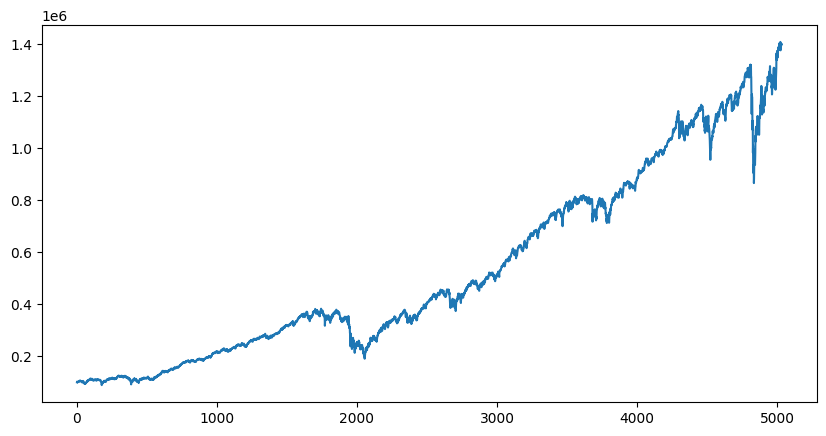

In [6]:
###################################################################################
# TEST 3 - Purchase highest performing stock monthly w/ annual rebalance ##########
###################################################################################

# initiate portfolio with default $100,000 capital
t3_portfolio = Portfolio()

# for storing the value of the portfolio at every date as coordinate pairs
t3_x = list()
t3_y = list()

# adding our symbols (with matching data in 'sector_historical') to the portfolio
for fund in sectors:
    t3_portfolio.add(fund)

# initial balancing of portfolio with remainder going to cash
t3_portfolio.even_balance(dates[0])

# day tracking
# there are 5033 trading days in the data
# approx. 21 trading days per months, so we will rebalance, deposit, and invest on 21 day cycles.
# this is an imperfect system but will still effectively represent the target since short term pricing is stochastic

# function to operate the test
def t3_run(portfolio, deposit):

    # iterating through all dates in set
    # start at n == 1 since we did an initial balancing on n == 0
    for n in range(1, len(dates)):

        # checking if we are (approx) beginning a new trading year
        # if yes, we rebalance the portfolio with even weight distribution
        if (n % 252) == 0:
            portfolio.even_balance(dates[n])

        # checking if we are (approx) beginning a new trading month
        # if yes, determine the worst performer and purchase the maximum amount
        if (n % 21) == 0:
            # new months, depositing cash
            portfolio.deposit(deposit)

            # determining start and end dates for the trading period being evaluated
            start_date = dates[n]
            end_date = dates[n-21]

            # finding which element of the portfolio performed the worst
            # purchasing max num of shares of worst performer
            symbol = portfolio.high_performer(start_date, end_date) 
            portfolio.max_buy(symbol, dates[n])

        # after all possible changes, determining worth of cash + holdings
        value = portfolio.get_portfolio_value(dates[n])

        # storing vals to coords
        t3_x.append(n)
        t3_y.append(value)

# run test 1
t3_run(t3_portfolio, deposit)

# total value on last date
print(t3_portfolio.get_portfolio_value('2020-12-31'))

# basic plot
plt.plot(t3_x, t3_y)
plt.show()

Let's observe what happens if we never rebalance and only push capital into the lowest performing elements of the portfolio.

1367443.0463399887


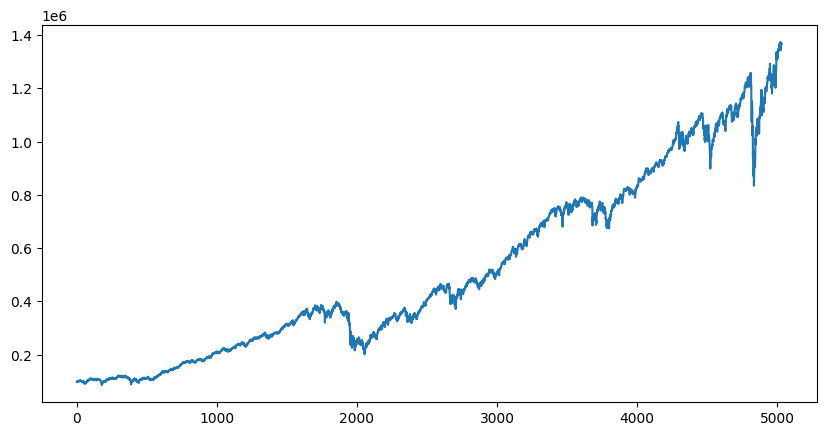

In [7]:
###################################################################################
# TEST 4 - Purchase lowest performing stock monthly ###############################
###################################################################################

# initiate portfolio with default $100,000 capital
t4_portfolio = Portfolio()

# for storing the value of the portfolio at every date as coordinate pairs
t4_x = list()
t4_y = list()

# adding our symbols (with matching data in 'sector_historical') to the portfolio
for fund in sectors:
    t4_portfolio.add(fund)

# initial balancing of portfolio with remainder going to cash
t4_portfolio.even_balance(dates[0])

# day tracking
# there are 5033 trading days in the data
# approx. 21 trading days per months, so we will rebalance, deposit, and invest on 21 day cycles.
# this is an imperfect system but will still effectively represent the target since short term pricing is stochastic

# function to operate the test
def t4_run(portfolio, deposit):

    # iterating through all dates in set
    # start at n == 1 since we did an initial balancing on n == 0
    for n in range(1, len(dates)):

        # checking if we are (approx) beginning a new trading month
        # if yes, determine the worst performer and purchase the maximum amount
        if (n % 21) == 0:
            # new months, depositing cash
            portfolio.deposit(deposit)

            # determining start and end dates for the trading period being evaluated
            start_date = dates[n]
            end_date = dates[n-21]

            # finding which element of the portfolio performed the worst
            # purchasing max num of shares of worst performer
            symbol = portfolio.low_performer(start_date, end_date) 
            portfolio.max_buy(symbol, dates[n])

        # after all possible changes, determining worth of cash + holdings
        value = portfolio.get_portfolio_value(dates[n])

        # storing vals to coords
        t4_x.append(n)
        t4_y.append(value)

# run test 1
t4_run(t4_portfolio, deposit)

# total value on last date
print(t4_portfolio.get_portfolio_value('2020-12-31'))

# basic plot
plt.plot(t4_x, t4_y)
plt.show()

Now we'll perform the same test but only pushing capital towards the highest performing elements.

1405459.8667607307


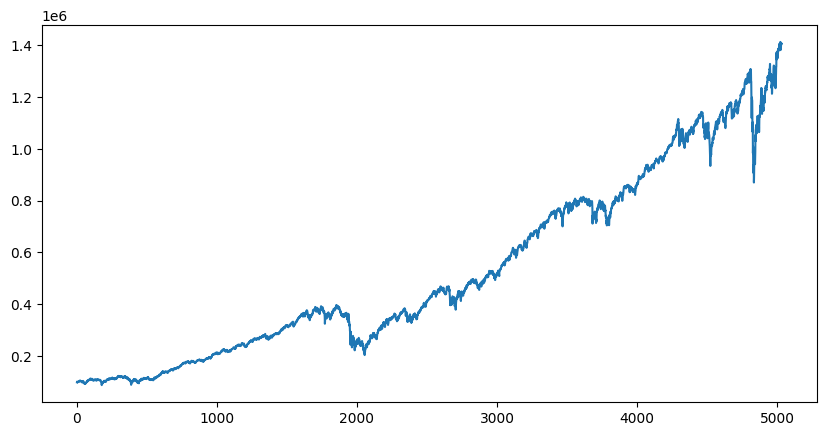

In [8]:
###################################################################################
# TEST 5 - Purchase highest performing stock monthly ##############################
###################################################################################

# initiate portfolio with default $100,000 capital
t5_portfolio = Portfolio()

# for storing the value of the portfolio at every date as coordinate pairs
t5_x = list()
t5_y = list()

# adding our symbols (with matching data in 'sector_historical') to the portfolio
for fund in sectors:
    t5_portfolio.add(fund)

# initial balancing of portfolio with remainder going to cash
t5_portfolio.even_balance(dates[0])

# day tracking
# there are 5033 trading days in the data
# approx. 21 trading days per months, so we will rebalance, deposit, and invest on 21 day cycles.
# this is an imperfect system but will still effectively represent the target since short term pricing is stochastic

# function to operate the test
def t5_run(portfolio, deposit):

    # iterating through all dates in set
    # start at n == 1 since we did an initial balancing on n == 0
    for n in range(1, len(dates)):

        # checking if we are (approx) beginning a new trading month
        # if yes, determine the worst performer and purchase the maximum amount
        if (n % 21) == 0:
            # new months, depositing cash
            portfolio.deposit(deposit)

            # determining start and end dates for the trading period being evaluated
            start_date = dates[n]
            end_date = dates[n-21]

            # finding which element of the portfolio performed the worst
            # purchasing max num of shares of worst performer
            symbol = portfolio.high_performer(start_date, end_date) 
            portfolio.max_buy(symbol, dates[n])

        # after all possible changes, determining worth of cash + holdings
        value = portfolio.get_portfolio_value(dates[n])

        # storing vals to coords
        t5_x.append(n)
        t5_y.append(value)

# run test 1
t5_run(t5_portfolio, deposit)

# total value on last date
print(t5_portfolio.get_portfolio_value('2020-12-31'))

# basic plot
plt.plot(t5_x, t5_y)
plt.show()